In [1]:
%matplotlib inline

/Users/ruslanmomot/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt

In [21]:
# params:
p = 0.2
r = 0.03
V = 1
C = 0.9
k = 0.01

In [4]:
def F(mu, alpha, d, ft):
    return sum([ft[i]*(p*(1-k*mu[i])+(1-p*(1-k*mu[i]))*qd(alpha, dk-1)) for i, dk in enumerate(d)])

def dU(alpha, dk):
    return V*p*k*(1-qd(alpha, dk)) - C


def qd(alpha, dk):
    return 1-(1-r*alpha)**dk

In [5]:
# -----
# load the network structure
# -----
f = np.load("f_face.npy")[:200]
d = np.load("d_face.npy")[:200]

In [6]:
# Calculate edge-perspective 
dav = sum([fi*di for fi,di in zip(f, d)])
ft = [fi*di/float(dav) for fi, di in zip(f, d)]

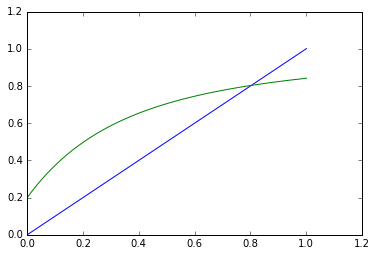

Solutions [alpha, F]:  [[0.80299999999991156, 0.80328213288014061], [0.80399999999991145, 0.80351352033008938]]


In [22]:
amax = 1.001
epsilon = (amax-1)/float(2)
alphas = np.arange(0, amax, amax-1)
Fs = []
fpoints = []
for alpha in alphas:
    # calculate strategy induced by alpha
    mu = [-1 if dU(alpha, dk) == 0 else 0 if dU(alpha, dk) < 0 else 1 for dk in d]
    Fcalc = F(mu, alpha, d, ft)
    Fs.append(Fcalc)
    #print "alpha = %s; F = %s" % (alpha, Fcalc)

    if abs(Fcalc - alpha) < epsilon:
        fpoints.append([alpha, Fcalc])

plt.plot(alphas, alphas)
plt.plot(alphas, Fs)
plt.show()
print "Solutions [alpha, F]: ", fpoints